In [2]:
import numpy as np
import pandas as pd

from src.M4_experiment import M4_parser
from src.ESRNN import ESRNN

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


def plot_prediction(y, y_hat, forecast=True):
    """
    """
    n_y = len(y)
    n_yhat = len(y_hat)
    ds_y = np.array(range(n_y))
    ds_yhat = np.array(range(n_y, n_y+n_yhat))

    plt.plot(ds_y, y, label = 'y')
    plt.plot(ds_yhat, y_hat, label='y_hat')
    plt.legend(loc='upper left')
    plt.show()

In [4]:
X, y = M4_parser(dataset_name='Quarterly', mode='train', num_obs=1000)
print(X.head())
print(y[0:6])

  unique_id         ts      x
0        Q1 1970-01-02  Macro
1        Q1 1970-01-03  Macro
2        Q1 1970-01-04  Macro
3        Q1 1970-01-05  Macro
4        Q1 1970-01-06  Macro
0    7407.412314
1    7528.566074
2    7374.709225
3    7395.514848
4    7654.007989
5    7686.847835
Name: y, dtype: float64


In [5]:
esrnn = ESRNN(max_epochs=0)
esrnn.fit(X,y)
pred_ini = esrnn.predict()

========== Training ESRNN ==========
Train finished!


In [6]:
unique_idx = 2
unique_id=X['unique_id'].unique()[unique_idx]

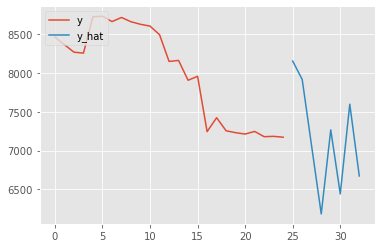

In [7]:
plot_prediction(X[X['unique_id']==unique_id]['y'], pred_ini[pred_ini['unique_id']==unique_id]['y_hat'])

In [8]:
esrnn = ESRNN(max_epochs=5)
esrnn.fit(X,y)
preds = esrnn.predict()

========== Training ESRNN ==========
========= Epoch 0 finished =========
Training time: 66.07075595855713
Forecast loss: 0.3114948570728302
========= Epoch 1 finished =========
Training time: 66.3941388130188
Forecast loss: 0.3019794523715973
========= Epoch 2 finished =========
Training time: 66.78033995628357
Forecast loss: 0.2909635901451111
========= Epoch 3 finished =========
Training time: 66.4191107749939
Forecast loss: 0.27987751364707947
========= Epoch 4 finished =========
Training time: 67.52942514419556
Forecast loss: 0.2716835141181946
Train finished!


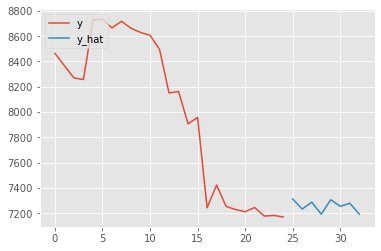

In [9]:
plot_prediction(X[X['unique_id']==unique_id]['y'], preds[preds['unique_id']==unique_id]['y_hat'])